In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

sns.set(color_codes=True)

In [2]:
df = pd.read_csv('./merged_df_efficiency.csv')
df = df.drop([
    'Unnamed: 0', 
    'description', 
    'geometry', 
    'amenity', 
    'shops_count', 
    'Efficiency Per Size Norm', 
    'efficiency_without_noise'
], axis=1)
df.head()

,air_quality,area,closest_shop,cloud_cover,height,humidity,temperature,efficiency
0,55,6489.091950,2,0.34,15,0.57,17.81,0.615261
1,55,243.836661,2,0.34,15,0.57,17.76,0.631757
2,55,120.319194,2,0.34,15,0.57,17.76,0.596376
3,55,299.354696,2,0.34,15,0.57,17.76,0.481979
4,55,93.194304,2,0.34,15,0.57,17.76,0.553214


In [3]:
df.describe()

,air_quality,area,closest_shop,cloud_cover,height,humidity,temperature,efficiency
count,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000
mean,53.304584,397.557358,339.156969,0.339688,14.957717,0.571979,17.843469,0.572996
std,2.753949,879.540615,283.150742,0.002384,0.574932,0.007506,0.131942,0.154043
min,45.000000,14.104158,0.000000,0.330000,0.000000,0.550000,17.470000,0.000000
25%,54.000000,106.445926,110.000000,0.340000,15.000000,0.570000,17.760000,0.475836
50%,55.000000,160.392502,294.000000,0.340000,15.000000,0.570000,17.810000,0.584824
75%,55.000000,338.657397,508.000000,0.340000,15.000000,0.570000,17.920000,0.683039
max,56.000000,20825.515571,1529.000000,0.350000,18.000000,0.610000,18.320000,1.000000


In [4]:
df = (df - df.mean()) / (df.max() - df.min())

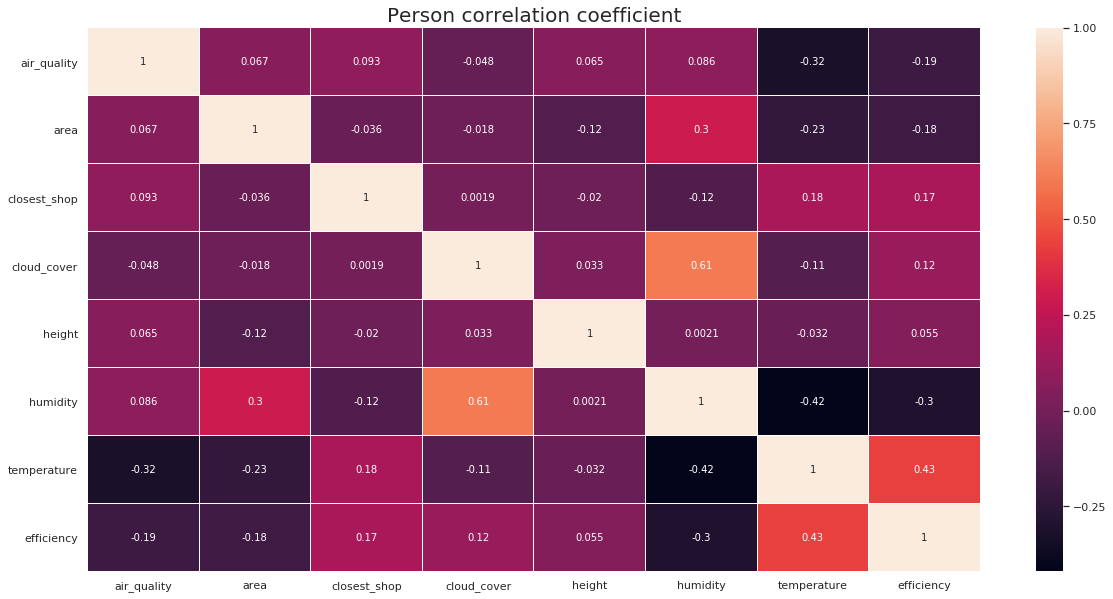

In [5]:
#Pearson
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Person correlation coefficient', fontsize=20)
sns.heatmap(
    corr, 
    ax=ax, 
    annot=True, 
    linewidths=.1, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values
)

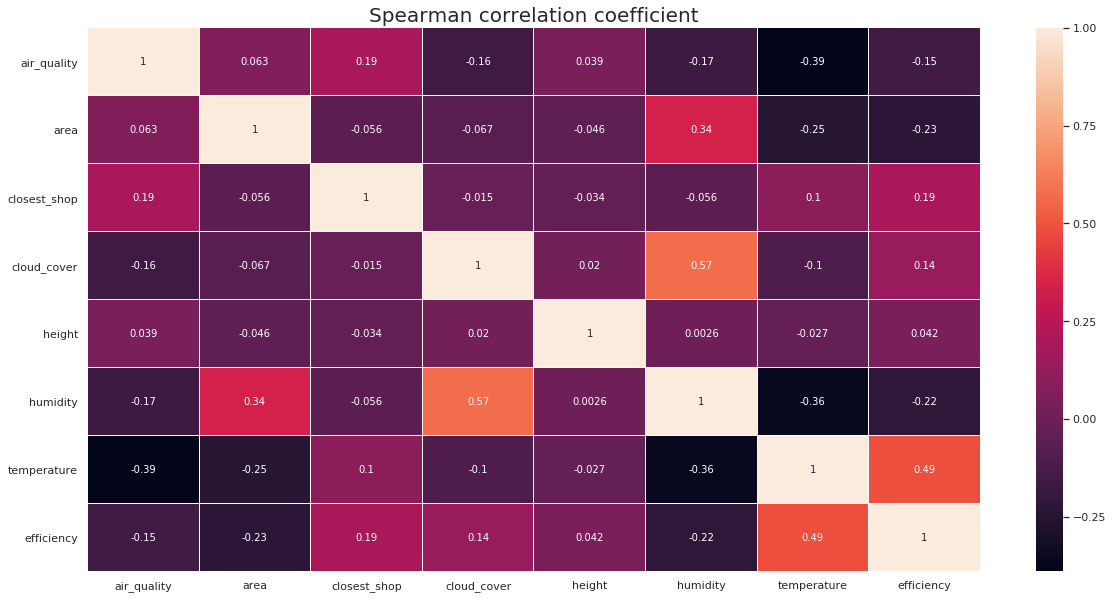

In [6]:
#Pearson
corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Spearman correlation coefficient', fontsize=20)
sns.heatmap(
    corr, 
    ax=ax, 
    annot=True, 
    linewidths=.1, 
    xticklabels=corr.columns.values, 
    yticklabels=corr.columns.values
)

/usr/local/bin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


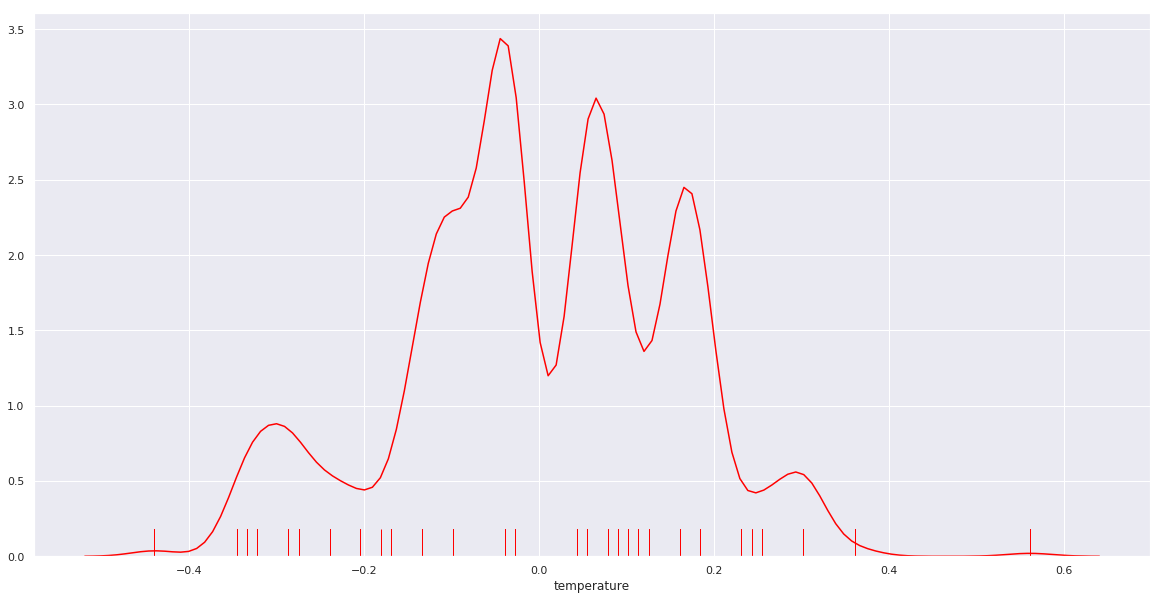

In [7]:
# log_salaries = np.log(salaries)
#histogram
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(df['temperature'], bins=None, hist=False, rug=True, color='red')

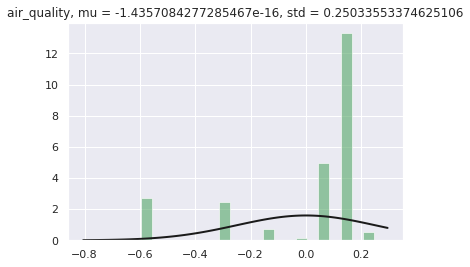

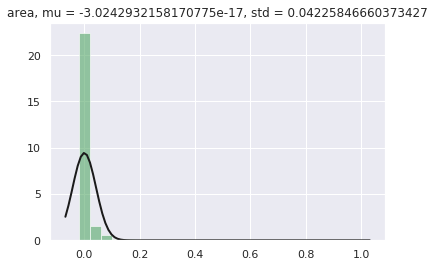

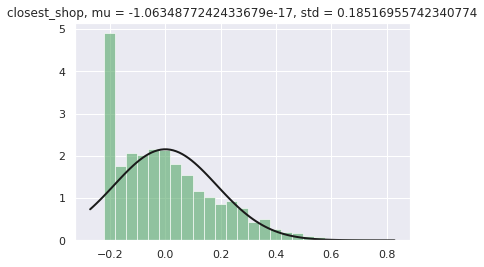

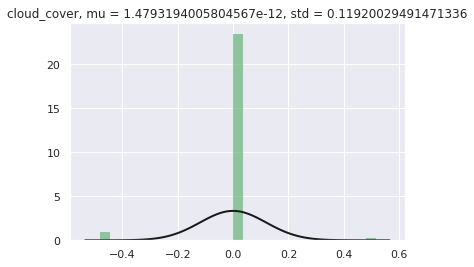

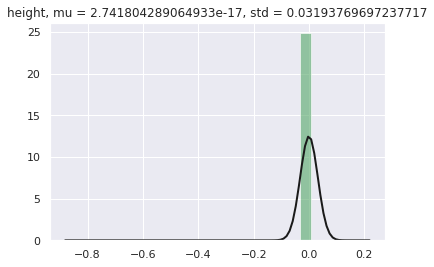

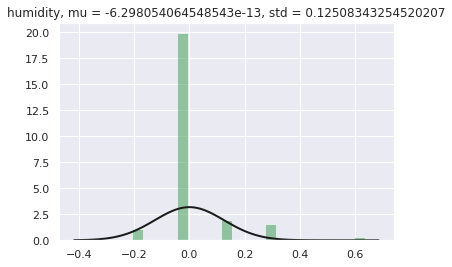

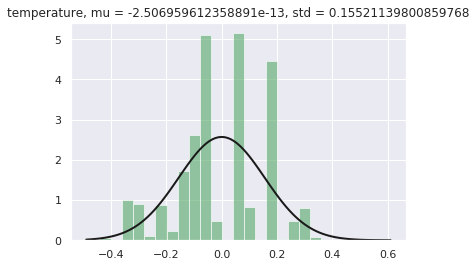

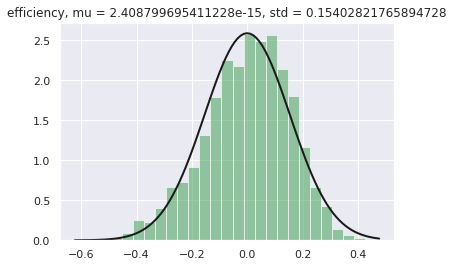

In [8]:
def plot_distribution(df, x):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[x])

    # Plot the histogram.
    plt.hist(df[x], bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "{}, mu = {}, std = {}".format(i, mu, std)
    plt.title(title)

    plt.show()
    

    


for i in df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', ''):
    plot_distribution(df, i)

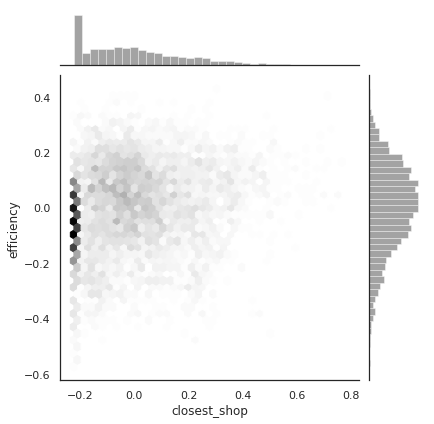

In [10]:
with sns.axes_style("white"):
    sns.jointplot(x=df['closest_shop'], y=df['efficiency'], kind="hex", color="k");